# HouseHold Median Income Prediction

In [1]:
#Importing the libraries

import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model  import LinearRegression

In [10]:
#loading the dataset

housing_data = pd.read_csv("data.xls")

In [12]:
#inspecting the dataset

housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [13]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15210 non-null  float64
 1   latitude            15210 non-null  float64
 2   housing_median_age  15210 non-null  float64
 3   total_rooms         15210 non-null  float64
 4   total_bedrooms      15062 non-null  float64
 5   population          15210 non-null  float64
 6   households          15210 non-null  float64
 7   median_income       15210 non-null  float64
 8   median_house_value  15210 non-null  float64
 9   ocean_proximity     15209 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [14]:
#selecting 2 features, predictor and a target, using the median income to predict the house value

housing_data[["median_income", "median_house_value"]].describe()

,median_income,median_house_value
count,15210.000000,15210.000000
mean,3.803106,198435.696187
std,1.888558,111404.650522
min,0.499900,23.000000
25%,2.510175,116700.000000
50%,3.454250,170700.000000
75%,4.660575,245775.000000
max,15.000100,500001.000000


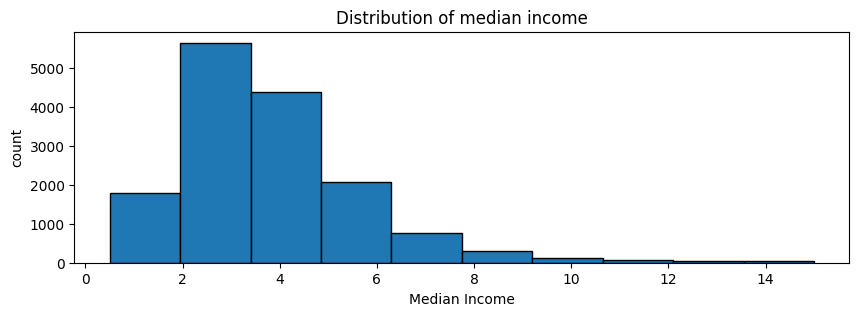

In [16]:
#visualizing the distribution of the median income 

plt.figure(figsize = (10,3))
plt.hist(housing_data["median_income"], bins = 10, edgecolor = "black")
plt.title("Distribution of median income")
plt.xlabel("Median Income")
plt.ylabel("count")
plt.show()

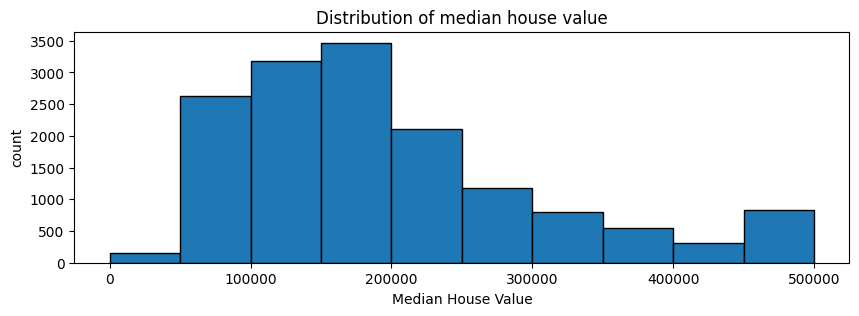

In [19]:
#Visualizing the distribution of the median house value
plt.figure(figsize = (10,3))
plt.hist(housing_data["median_house_value"], bins = 10, edgecolor = "black")
plt.title("Distribution of median house value")
plt.xlabel("Median House Value")
plt.ylabel("count")
plt.show()

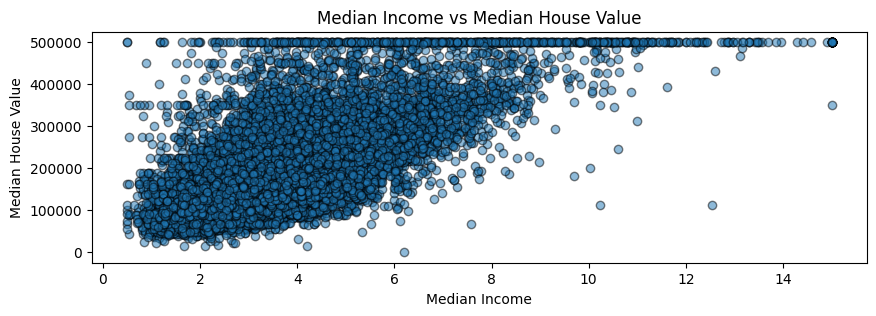

In [21]:
#finding the correlation between the two features
plt.figure(figsize = (10,3))
plt.scatter(housing_data["median_income"], housing_data["median_house_value"], alpha = 0.5 , edgecolor = "k")
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()


In [22]:
#Defining the features (x) and target (y)

x = housing_data[["median_income"]]
y = housing_data[["median_house_value"]]

print(x.shape)
print(y.shape)


(15210, 1)
(15210, 1)


In [23]:
#creating the linear regression model

model = LinearRegression()
model.fit(x,y)#Training the model on the features|

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
#Getting the parameters
slope = round(float(model.coef_[0]), 2)
intercept = round(float(model.intercept_), 2)

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 41068.75
Intercept: 42246.87


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2876\4147824070.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = round(float(model.coef_[0]), 2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2876\4147824070.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intercept = round(float(model.intercept_), 2)


In [25]:
#Evaluating the model

y_pred = model.predict(x)

print(y_pred)

[[384152.45799557]
 [383175.02167212]
 [340299.24345053]
 ...
 [216789.07542025]
 [245742.54634575]
 [296663.69329685]]


In [26]:
y_pred = y_pred.flatten()


results_df = pd.DataFrame({
    "Actual": y.squeeze(),
    "Predicted": y_pred
})

display(results_df.head())

,Actual,Predicted
0,452600.0,384152.457996
1,358500.0,383175.021672
2,352100.0,340299.243451
3,341300.0,274001.955344
4,342200.0,200205.512924


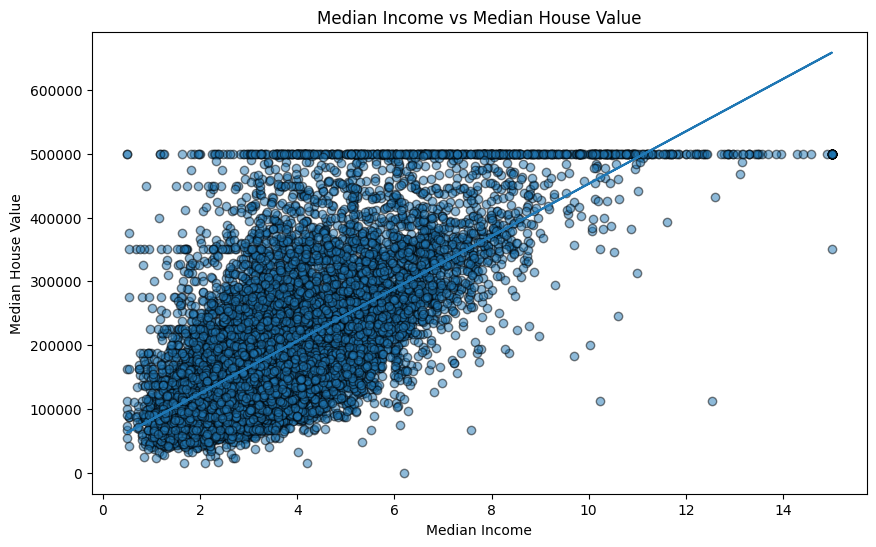

In [30]:
plt.figure(figsize=(10, 6))

# Scatter plot (actual data)
plt.scatter(
    housing_data["median_income"],
    housing_data["median_house_value"],
    alpha=0.5,
    edgecolor = "black"
)

# Regression line
plt.plot(
    housing_data["median_income"],
    y_pred
)

plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")

plt.show()
